In [1]:
#IMPORTING ALL THE NECESSARY PACKAGES
import cv2 
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
#SAVING DATASETS DIRECTORY INTO VARIABLES
training_data = "day_night_images/training/"
test_data = "day_night_images/test/"

In [19]:
#LOADING DATASET WITH THE HELP OF LOAD_DATASET FUNCTION IN HELPERS.PY
IMAGE_LIST = helpers.load_dataset(training_data)

In [4]:
#STANDARIZING ALL THE IMAGES IN THE DATASET
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


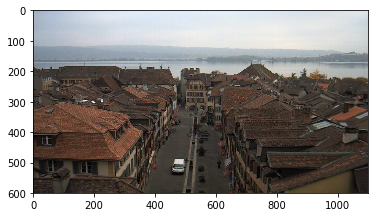

In [20]:
#TESTING THE STANDARIZATION
image_num = 4
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

In [7]:
#TAKING AVERAGE BRIGHTNESSS AS A FEATURE 
def avg_brightness(rgb_image):
    
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    
    sum_brightness = np.sum(hsv[:,:,2])
    area = 600*1100.0  # pixels
    avg = sum_brightness/area
    
    return avg

Average brightness: 129.019595455


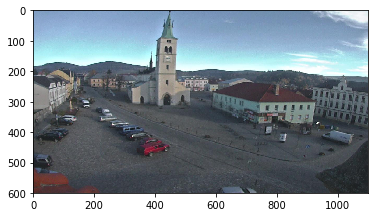

In [9]:
#TESTING AVERAGE BRIGHTNESS
image_num = 50
test_image = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_image)
print('Average brightness: ' + str(avg))
plt.imshow(test_image)

In [10]:
#LABEL ESTIMATION FUNCTION USING A THRESHOLD VALUE
def estimate_label(rgb_image):
     
    avg = avg_brightness(rgb_image)
    predicted_label = 0
    threshold = 99
    if(avg > threshold):
        predicted_label = 1
    
    return predicted_label    
    

In [11]:
#USING RANDOM FUNCTION TO 
import random

TEST_IMAGE_LIST = helpers.load_dataset(test_data)

STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

random.shuffle(STANDARDIZED_TEST_LIST)

In [12]:
def get_misclassified_images(test_images):
    misclassified_images_labels = []

    for image in test_images:

        im = image[0]
        true_label = image[1]

        predicted_label = estimate_label(im)
 
        if(predicted_label != true_label):
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    return misclassified_images_labels


In [13]:
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = 100*(num_correct/total)

print('Accuracy: ' + str(accuracy) + '%')
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 93.75%
Number of misclassified images = 10 out of 160


0


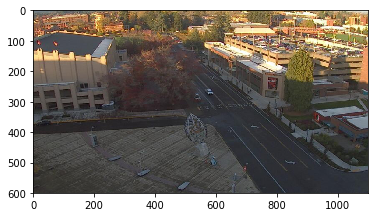

In [17]:
num = 3
test_mis_im = MISCLASSIFIED[num][0]
plt.imshow(test_mis_im)
print(str(MISCLASSIFIED[num][1]))

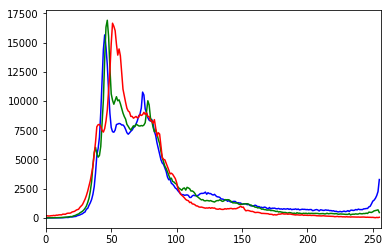

In [18]:
color = ('b','g','r')
for i,col in enumerate(color):
    hist = cv2.calcHist([test_mis_im],[i],None,[256],[0,256])
    plt.plot(hist,color = col)
    plt.xlim([0,256])
plt.show()